In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [23]:
n = 50
s = 30
K = 50

In [24]:
def calc_ak(samples):
    return [sum([x**k for x in sample])/n for sample in samples]

def estimate(a, k, calc_theta):
    theta = [calc_theta(ak, k) for ak in a]
    return sum([(th - 1) ** 2 for th in theta]) / s

In [34]:
# Равномерное распределение
uniform_samples = np.array([np.random.uniform(0,1,n) for i in range(s)])
uniform_result = []
uniform_theta = lambda ak, k: ((k + 1) * ak) ** (1 / k)

# Экспоненциальное распределение
exp_samples = np.array([np.random.exponential(1, n) for i in range(s)])
exp_result = []
exp_theta = lambda ak, k: (ak/factorial(k)) ** (1 / k)

for k in range(1, K):
    # Равномерное распределение
    uniform_a = calc_ak(uniform_samples)
    uniform_result.append(estimate(uniform_a, k, uniform_theta))
    
    # Экспоненциальное распределение
    exp_a = calc_ak(exp_samples)
    exp_result.append(estimate(exp_a, k, exp_theta))

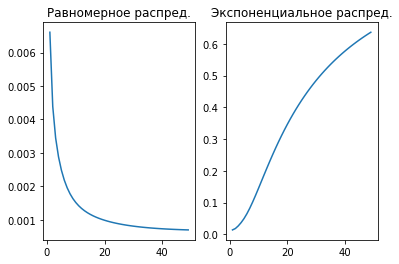

In [35]:
# Покажем зависимость на графике

# Равномерное распределение
plt.subplot(121)
plt.title("Равномерное распред.")
plt.plot(range(1, K), uniform_result)

# Экспоненциальное распределение
plt.subplot(122)
plt.title("Экспоненциальное распред.")
plt.plot(range(1, K), exp_result)

plt.show()